In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<b>Assignment 4 </b>: Apply Roberts, Sobel and Laplacian filter masks on the given input image to obtain the
edges.

<h1> Applying Filters for detecting edges </h1>

<h4> Utility functions for convolutions and padding </h4>

In [34]:
#padding
def pad(img, size) :
    #create empty array of zeros
    emp = np.zeros((img.shape[0] + 2 * (size // 2), img.shape[1] + 2 * (size // 2)), dtype = np.uint8)
    for i in range(size // 2, img.shape[0] + size // 2 - 1) :
        for j in range(size // 2, img.shape[1] + size // 2 - 1) :
            #assign image pixels
            emp[i][j] = img[i - size][j - size]
    return emp

def conv(img, f) :
    f_size = f.shape[0]
    #first pad image
    pad_img = pad(img, f_size)
    #image to hold result of convolution
    res_img = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            #part of image to undergo convolution
            ins_img = pad_img[i : i + f_size , j : j + f_size]
            val = np.sum(ins_img * f)
            #assignment of result of convolution as final image pixel
            res_img[i][j] = val
    return res_img

def threshold(img, t) :
    return (img > t) * img 

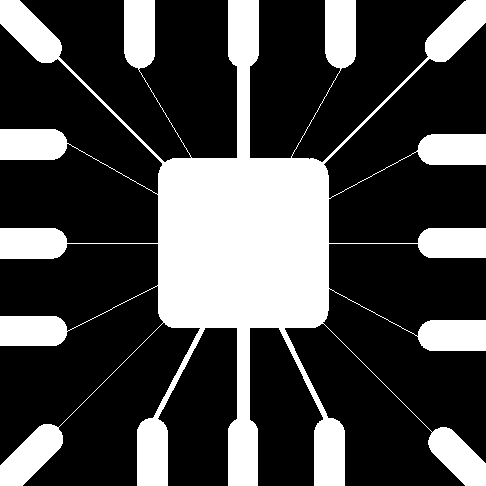

In [35]:
img = Image.open("DIP3E_Original_Images_CH10/Fig1005(a)(wirebond_mask).tif")
img_ar = np.asarray(img)
img

In [36]:
#threshold
th = 50

<h4> Robert's Filter </h4>

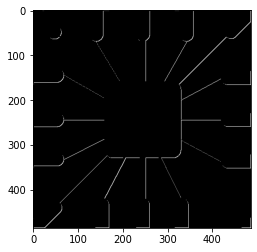

In [37]:
fil = np.asarray([[1, 0],
                  [0, -1]])
pad_img = threshold(conv(img_ar, fil),th)
plt.imshow(pad_img, cmap = "gray")

<h6> Analysis </h6>

The edge detector detects edges at 45 degrees better than other edges. It completely ignores the edges at 135 degrees.

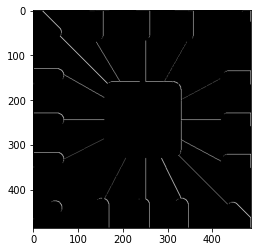

In [38]:
fil = np.asarray([[0, -1],
                      [1, 0]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

<h6> Analysis </h6>

The edge detector detects edges at 135 degrees better than other edges. It completely ignores the edges at 45 degrees.

<h4> Sobel's filter </h4>

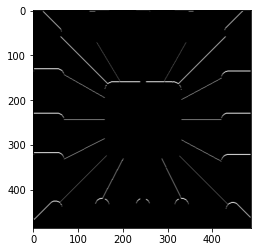

In [39]:
#horizontal edge detector
fil = np.asarray([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

<h6> Analysis </h6>

The edge detector detects horizontal edges better than other edges. It completely ignores the vertical edges.

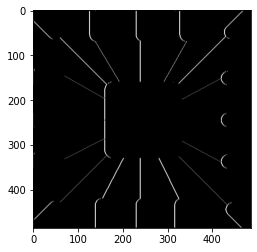

In [40]:
#vertical edge detector
fil = np.asarray([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

<h6> Analysis </h6>

The edge detector detects vertical edges better than other edges. It completely ignores the horizontal edges.

<h4> Laplacian Filter </h4>

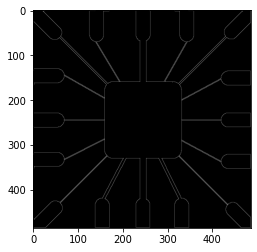

In [41]:
fil = np.asarray([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

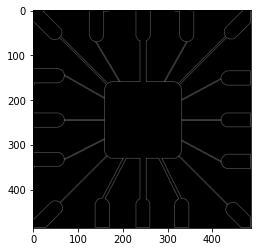

In [42]:
fil = np.asarray([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

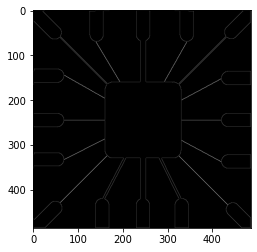

In [43]:
fil = np.asarray([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

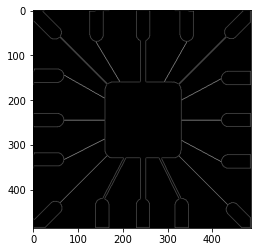

In [44]:
fil = np.asarray([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])
pad_img = threshold(conv(img_ar, fil), th)
plt.imshow(pad_img, cmap = "gray")

<h6> Analysis </h6>

The Laplacian filter performs better at edge detection than all other filters. It produces sharp edges.